In [25]:
import numpy as np
import matplotlib.pyplot as plt
from pygimli.physics import SIP
import pybert as pb

In [26]:
def compareTDFD(f=None, t=None, taus=None, **synthCC):
    # %% define Cole-Cole model
    synthCC.setdefault("rho", 1)
    t = t or np.logspace(-2, 0.6, 31)
    f = f or np.logspace(-2, 2, 41)
    taus = taus or np.logspace(-4, +3, 51)
    decay = pb.Decay(t=t)
    decay.v = decay.simulate(**synthCC)
    decay.invert()
    decay.decompose(error=0.01, tau=taus)
    rhoC = SIP.modelColeColeRho(f, **synthCC)
    spec = SIP.SIPSpectrum(f=f, amp=np.abs(rhoC), phi=-np.angle(rhoC))
    spec.fitColeCole()
    spec.fitDebyeModel(tau=taus, new=False)   
    fig, ax = plt.subplots()
    ax.semilogx(taus, decay.modelDD, "x-", label="TD")
    ax.semilogx(taus, spec.mDD, "+-", label="FD")
    ax.vlines(decay.logMeanTau(), *ax.get_ylim(), color="C0", ls="dashed")
    ax.vlines(spec.logMeanTau(), *ax.get_ylim(), color="C1", ls="dashed")
    ax.vlines(synthCC["tau"], *ax.get_ylim(), color="red", ls="dashed")
    ax.plot(decay.modelCC[1], 0, "x", color="C0")
    ax.plot(spec.mCC[1], 0, "x", color="C1")
    ax.set_xlabel(r"$\tau$ (s)")
    ax.set_title("Debye decomposition")
    ax.grid()
    ax.legend()
    print("Comparison of Cole-Cole parameters")
    print("synth FD  TD")
    keys = ["m", "tau", "c"]
    for i in range(-3, 0):
        key = keys[i]
        print(key+"\t{:.3f}\t{:.3f}\t{:.3f}".format(synthCC[key], decay.modelCC[i], spec.mCC[i]))
    print("Debye")
    print("logMeanTau=", decay.logMeanTau(), spec.logMeanTau())
    return decay, spec





Comparison of Cole-Cole parameters
synth FD  TD
m	0.050	0.050	0.050
tau	0.300	0.300	0.298
c	0.400	0.400	0.400
Debye
logMeanTau= 0.1301009653053686 0.4022843162745733


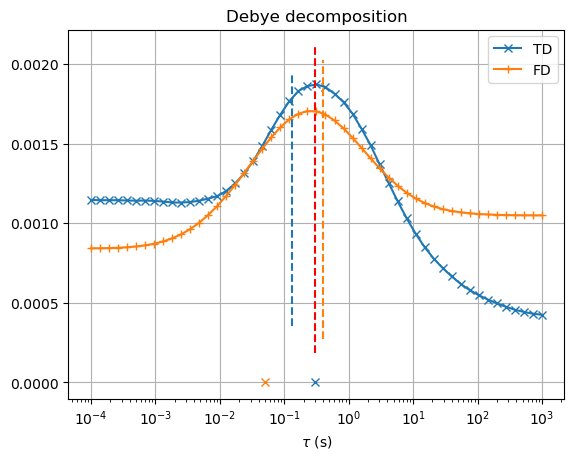

In [27]:
synthCC = dict(m=0.05, tau=0.3, c=0.4, rho=100)
decay, spec = compareTDFD(**synthCC)

In [28]:
# decay.showAll(xScale="log", yScale="log");
# decay.modelCC
# spec.mCC

In [29]:
# spec.fitColeCole()
# spec.showAll()

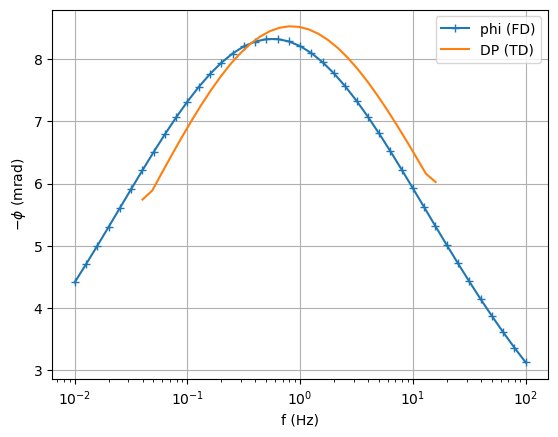

In [30]:
# Compare Differential polarizability with phase spectrum
fig, ax = plt.subplots()
spec.showPhase(ax=ax, label="phi (FD)")
ax.plot(1/2/np.pi/decay.t, decay.dp()*1600, label="DP (TD)")
ax.legend()


(<Figure size 640x480 with 2 Axes>,
 array([<Axes: title={'center': 'new'}, xlabel='f (Hz)', ylabel='$\\rho$ ($\\Omega$m)'>,
        <Axes: xlabel='f (Hz)', ylabel='$-\\phi$ (mrad)'>], dtype=object))

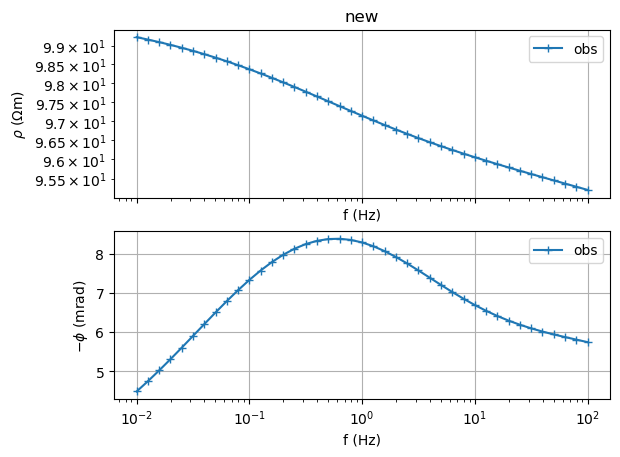

In [31]:
out = decay.convertDDToSpectrum(spec.f, rho=synthCC["rho"])
out.showData()

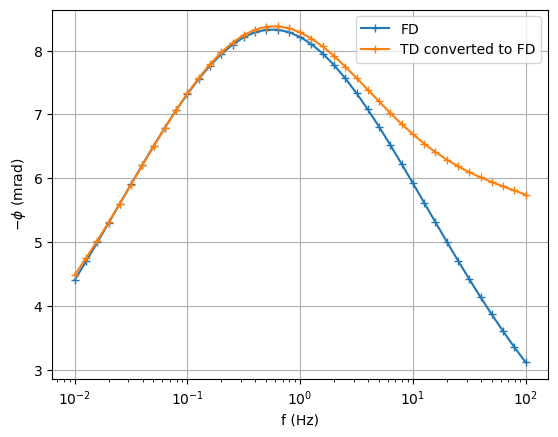

In [32]:
fig, ax = plt.subplots()
spec.showPhase(ax=ax, label="FD")
out.showPhase(ax=ax, label="TD converted to FD")

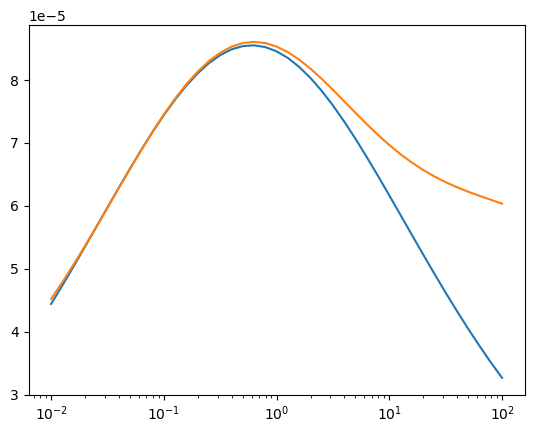

In [33]:
fig, ax = plt.subplots()
sig1, sig2 = spec.realimag(cond=True)
ax.semilogx(spec.f, sig2, label="FD")
sig1, sig2 = out.realimag(cond=True)
ax.semilogx(out.f, sig2, label="TD->FD")

In [34]:
sig0 = 1000. / synthCC["rho"]  # sigma0 in mS/m
maxsig2s = max(sig2) * 1000
a1 = 0.14
mn = sum(decay.modelDD) / synthCC["rho"] * 1000
sig2sTD = mn * a1
print("sigma''", maxsig2s, sig2sTD)
a2 = 3.47e-9
b1 = 1.11
b2 = 2.41
K = a2 * sig0**b1 / maxsig2s**b2
print(f"K={K}m/s")


sigma'' 0.08604767555731892 0.08162182711841214
K=1.6504719204789334e-05m/s
